[View in Colaboratory](https://colab.research.google.com/github/tayojabar/Activity/blob/master/MarketingCampaign.ipynb)

### Import and Load all Dependencies

In [0]:
%matplotlib inline

In [2]:

import seaborn as sns
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy
import sklearn.linear_model as linear
import random
sns.set(style="darkgrid")
import os,sys
import xlrd
import math
from pandas.tools.plotting import scatter_matrix
plt.style.use('ggplot')
%matplotlib inline
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn import metrics as mt
import datetime
import time
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
import pylab as p
from sklearn import tree
from io import BytesIO as StringIO
from IPython.display import Image
import pydotplus
from IPython.display import Image  
import pydotplus
from io import BytesIO as StringIO
import graphviz
import copy
from copy import deepcopy
from sklearn import cross_validation
from numpy import random as np_random
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
!pip install xlrd
!pip install graphviz
!pip install pydotplus

    100% |████████████████████████████████| 112kB 2.2MB/s 
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 286kB 2.5MB/s 
  Running setup.py bdist_wheel for pydotplus ... - done
  Stored in directory: /content/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
import numpy as np
import pandas as pd

In [1]:
! pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/01/55/83/63a3c2294c9f9ff44f1600cea21bae22d4698b83a98234fc01
Successfully built kaggle


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
# This code assumes your CSV files are in a folder. It will print out the files in a folder and their unique identifiers which will be used below. 
# Replace <FOLDER ID> with the long string of numbers and letters in the URL of the folder in Google Drive. 
# If the files are located at the top level of Google Drive, replace <FOLDER ID> with ‘root’. The output should look like:


file_list = drive.ListFile({'q': "'1BXNYnZzwfDW14lrThzgjEDAcgxJOqYb1' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Tester.csv, id: 1Y2KR870YBPAqT5dO5vZN0NBudenZeXKe
title: Trainer.csv, id: 1VgvYflTl98T7IS4iAmGGoOHdMBXmp9_t
title: Tester.csv, id: 1lWF8QIZah5YWf-qeBxYTgC2A4b5zkmzFWb1MG15bj2Q
title: Tester.csv, id: 1MXJyiUfBWn4I1N6CmmYO-BPk6MlnpCzHxpM1lkXUL2Y
title: Traine.csv, id: 1TvoxXtrOAE2cBjcMi92gjjkqlogPfSYp7IYaUSyHwZg
title: Sample_submission.csv, id: 1t22PMie_vu2mm8z66DAOmbVk51QnxWFH
title: Train.csv, id: 1XDqp_btDY_8lS05OuHLcUc6Ii9a0Zr3q
title: Test.csv, id: 1EdawySUm94B78qZX9yM9U3ilBu81ghsl


In [0]:
train_downloaded = drive.CreateFile({'id': '1VgvYflTl98T7IS4iAmGGoOHdMBXmp9_t'})
train_downloaded.GetContentFile('Trainer.csv')
test_downloaded = drive.CreateFile({'id': '1Y2KR870YBPAqT5dO5vZN0NBudenZeXKe'})
test_downloaded.GetContentFile('Tester.csv')  
test_downloaded = drive.CreateFile({'id': '1lI7RgIHrRnlu8FgdfgZAR5-nd_oHcwCS'})
test_downloaded.GetContentFile('Sample_submission.csv')  

In [8]:
!ls

datalab  Sample_submission.csv	Tester.csv  Trainer.csv


In [9]:
dataframe = pd.read_csv("Trainer.csv")
print(dataframe.info())
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8929 entries, 0 to 8928
Data columns (total 18 columns):
customer_id    8929 non-null int64
age            8929 non-null int64
job            8929 non-null object
marital        8929 non-null object
education      8929 non-null object
default        8929 non-null object
balance        8929 non-null int64
housing        8929 non-null object
loan           8929 non-null object
contact        8929 non-null object
day            8929 non-null int64
month          8929 non-null object
duration       8929 non-null int64
campaign       8929 non-null int64
pdays          8929 non-null int64
previous       8929 non-null int64
poutcome       8929 non-null object
deposit        8929 non-null int64
dtypes: int64(9), object(9)
memory usage: 1.2+ MB
None


,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,2844,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1
1,3806,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1
2,8310,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0
3,1840,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1
4,5881,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0


###Exploratory Data Analysis

In [18]:
def examine_data_frame( df):
    for name in df.columns:
        print ("----------")
        print (df[ name].dtype)
        if df[ name].dtype is np.dtype( 'O'):
            print (df[ name].value_counts())
            print ("Name: ", name)
        else:
            print (df[ name].describe())

examine_data_frame(dataframe)

----------
object
RGD008877     1
RGD006783     1
RGD00713      1
RGD00625      1
RGD008451     1
RGD004707     1
RGD001866     1
RGD002700     1
RGD002010     1
RGD009146     1
RGD00263      1
RGD008335     1
RGD00401      1
RGD001224     1
RGD001863     1
RGD004197     1
RGD00740      1
RGD005135     1
RGD007076     1
RGD005903     1
RGD001159     1
RGD00224      1
RGD00452      1
RGD005905     1
RGD009263     1
RGD001221     1
RGD0011112    1
RGD007916     1
RGD006707     1
RGD006981     1
             ..
RGD007933     1
RGD0010982    1
RGD009175     1
RGD002182     1
RGD009134     1
RGD002835     1
RGD002441     1
RGD00305      1
RGD003185     1
RGD008042     1
RGD009679     1
RGD006600     1
RGD007163     1
RGD007719     1
RGD001786     1
RGD0010370    1
RGD005403     1
RGD004634     1
RGD008529     1
RGD005284     1
RGD00613      1
RGD0011140    1
RGD0011116    1
RGD005287     1
RGD0010873    1
RGD006919     1
RGD003420     1
RGD005330     1
RGD007726     1
RGD006044     1
Name: 

In [19]:
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']
data_1 = dataframe[cols]
data_dummies = pd.get_dummies(data_1)
result_df = pd.concat([data_dummies, dataframe], axis=1)
result_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,0,0,0,1,0,0,0,0,0,...,no,cellular,29,oct,164,2,-1,0,unknown,1
1,0,0,0,0,0,1,0,0,0,0,...,no,cellular,3,aug,187,2,180,6,success,1
2,0,0,0,0,0,0,0,0,0,1,...,no,cellular,12,aug,104,8,-1,0,unknown,0
3,0,0,0,0,1,0,0,0,0,0,...,no,cellular,7,may,1030,1,169,3,success,1
4,0,1,0,0,0,0,0,0,0,0,...,no,unknown,4,jun,188,2,-1,0,unknown,0


In [20]:
result_df.columns.values

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'customer_id', 'age', 'job', 'marital',
       'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
    

In [0]:
result_df['output'] = result_df['deposit'].apply(lambda x: 1 if x =='yes' else 0)

In [22]:
grouped = result_df.groupby( "deposit")
nr_employed = grouped[ "month"].describe()
nr_employed = nr_employed.unstack( level=-1)
print (nr_employed)

        deposit
count   0          4716
        1          4213
unique  0            12
        1            12
top     0           may
        1           may
freq    0          1547
        1           750
dtype: object


deposit         0         1
month                      
apr      0.030575  0.051854
aug      0.074812  0.057341
dec      0.001120  0.008960
feb      0.029343  0.040094
jan      0.018143  0.013103
jul      0.079404  0.056221
jun      0.059245  0.048494
mar      0.002800  0.022287
may      0.173256  0.083996
nov      0.048494  0.035838
oct      0.006384  0.028335
sep      0.004592  0.025311


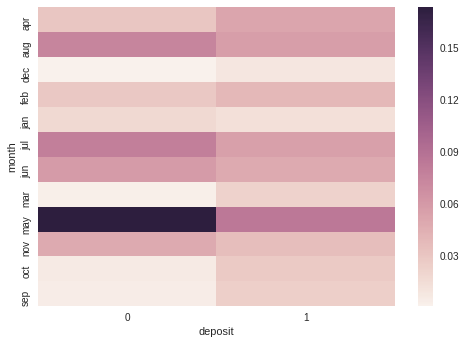

In [22]:
frequencies = pd.crosstab( result_df[ "month"], result_df[ "deposit"]).apply(lambda r: r/len(result_df))
print (frequencies)

sns.heatmap( frequencies)

### Decision Tree

In [0]:
def error_rate(true_class_data, prediction_model_data):
    fp=0.0
    fn=0.0
    for t, p in zip(true_class_data, prediction_model_data):
        if t==0 and p==1:
            fp=fp+1
        elif t==1 and p==0:
            fn=fn+1
    return (fp+fn)/len(true_class_data)

def cross_validate_10_fold( X, y, model):
    ret_scores=[]
    data
    for n in range(3):
        model = tree.DecisionTreeClassifier(class_weight="balanced").fit( X, y)

        # Evaluate the models using crossvalidation
        scores = 1-cross_validation.cross_val_score(model, X, y, scoring="accuracy", cv=10)
        for s in scores:
            ret_scores.append(s)
    sample_thetas=non_param_bootstrap(scores, 10000)
    ci=stats.mstats.mquantiles( sample_thetas, [0.05, 0.95])
    return ci

def resample( data):
    n = len( data)
    return [ data[ i] for i in [np_random.randint(0, n - 1) for _ in range( 0, n)]]

def non_param_bootstrap(original_data, num_sampling):
    return np.array( [np.mean( sample) for sample in [resample(original_data) for i in range( 0, num_sampling)]])

In [0]:
result_df2 = result_df[['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 
       'education_unknown', 'default_no','default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 
       'poutcome_success', 'age','campaign', 'pdays', 'previous',
       'output']]
y = result_df2['output'].values
X = result_df2[['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 
       'education_unknown', 'default_no','default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 
       'poutcome_success', 'age','campaign', 'pdays', 'previous',
       'output']].values

In [0]:
np_random.seed(1)
ret_scores=[]

for n in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = tree.DecisionTreeClassifier(class_weight = "balanced").fit( X_train, y_train)
    
    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(model, X_test, y_test, scoring="accuracy", cv =10)
    for s in scores:
        ret_scores.append(s)
sample_thetas_1=non_param_bootstrap(scores, 10000)
ci_1=stats.mstats.mquantiles( sample_thetas_1, [0.05, 0.95])

In [105]:
print ('Accuracy for DecisionTreeClassifier:', np.mean(sample_thetas_1), ci_1)

Accuracy for DecisionTreeClassifier: 1.0 [1. 1.]


In [106]:
clf = tree.DecisionTreeClassifier(max_depth =1)
clf.fit(X,y)

tree.export_graphviz(clf,out_file='mytree.dot')

features = ['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 
       'education_unknown', 'default_no','default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 
       'poutcome_success', 'age','campaign', 'pdays', 'previous', 'deposit']
target = ['deposit']

out = StringIO()
tree.export_graphviz(clf, out_file = out,feature_names=features,  
                         class_names=target,filled=True)
 
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

TypeError: ignored

### Logistic Regression

In [10]:
data = pd.read_csv('Trainer.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(8929, 18)
['customer_id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [31]:
data['education'].unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [32]:
data['deposit'].value_counts()

0    4716
1    4213
Name: deposit, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


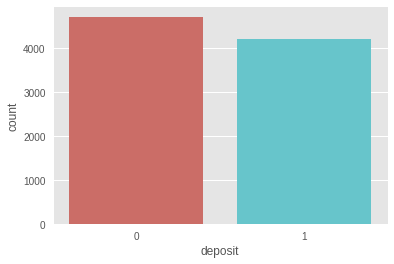

In [50]:
sns.countplot(x='deposit',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [51]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit
job,,,,,,,,
admin.,39.505587,1194.503724,15.236499,350.531657,2.368715,65.575419,1.018622,0.469274
blue-collar,39.662404,1199.501279,15.179028,394.225703,2.560742,42.970588,0.624041,0.361893
entrepreneur,43.019011,1803.794677,15.433460,366.418251,2.760456,34.551331,0.615970,0.387833
housemaid,47.556561,1385.447964,16.371041,350.325792,2.733032,36.280543,0.538462,0.416290
management,40.149877,1827.427518,15.750860,357.278133,2.600983,54.161671,0.920885,0.499754
retired,65.407874,2481.467717,15.480315,382.582677,2.144882,52.897638,0.985827,0.662992
self-employed,39.668693,1806.471125,16.021277,388.072948,2.525836,49.106383,0.930091,0.449848
services,38.054795,1027.476712,15.700000,390.950685,2.510959,50.879452,0.689041,0.408219
student,26.170732,1547.850174,15.104530,324.891986,2.135889,67.905923,1.303136,0.735192


In [52]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit
marital,,,,,,,,
divorced,47.485714,1339.592381,15.630476,390.078095,2.481905,46.543810,0.712381,0.482857
married,44.582509,1629.373170,15.710328,358.341314,2.629402,49.888801,0.826276,0.430748
single,33.036460,1471.422655,15.538761,384.028319,2.341239,54.943009,0.896637,0.541239


In [53]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit
education,,,,,,,,
primary,48.291294,1523.982913,15.521562,385.272579,2.658259,39.086249,0.666395,0.392189
secondary,40.161085,1319.306220,15.575074,371.056505,2.476874,53.169743,0.823422,0.446115
tertiary,39.324751,1865.083076,15.745966,365.000687,2.492276,53.275318,0.941641,0.538277
unknown,46.075377,1763.306533,16.095477,352.273869,2.791457,49.329146,0.706030,0.515075


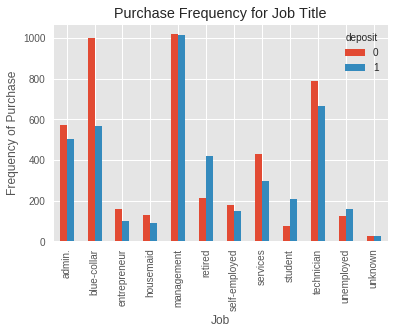

In [55]:
%matplotlib inline
pd.crosstab(data.job,data.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

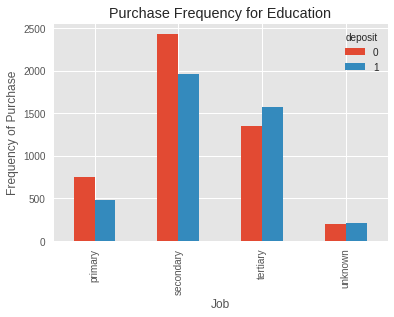

In [57]:
%matplotlib inline
pd.crosstab(data.education,data.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_education')

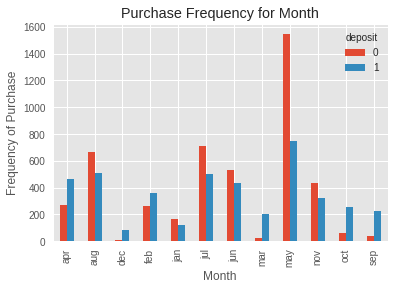

In [58]:
%matplotlib inline
pd.crosstab(data.month,data.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_month')

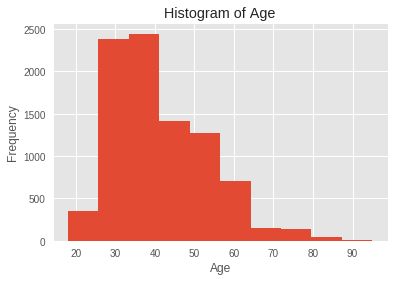

In [59]:

data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [99]:

cat_list = pd.get_dummies(data=data, columns = ['job','marital','education','default','housing','loan','contact','month','poutcome'], \
                                   prefix = ['job','marital','education','default','housing','loan','contact','month','poutcome'])
cat_list.head()

,customer_id,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2844,31,81,29,164,2,-1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,3806,62,569,3,187,2,180,6,1,0,...,0,0,0,0,0,0,0,0,1,0
2,8310,35,432,12,104,8,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1840,43,1429,7,1030,1,169,3,1,0,...,0,0,1,0,0,0,0,0,1,0
4,5881,29,25,4,188,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [0]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [102]:
data_final=cat_list[to_keep]
data_final.columns.values

array(['customer_id', 'age', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'deposit'], dtype=object)

In [112]:
data_final_vars=data_final.columns.values.tolist()
y=['deposit']
X=[i for i in data_final_vars if i not in y]
print(X)

['customer_id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [113]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg, 10)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
cols = ['customer_id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
ids = data_final['customer_id']
X=data_final[cols]
y=data_final['deposit']
#print (ids)

In [115]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.133445
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                 8929
Model:                          Logit   Df Residuals:                     8921
Method:                           MLE   Df Model:                            7
Date:                Sat, 21 Apr 2018   Pseudo R-squ.:                  0.8070
Time:                        08:27:20   Log-Likelihood:                -1191.5
converged:                       True   LL-Null:                       -6174.9
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
customer_id    -0.0017   4.87e-05    -34.546      0.000      -0.002      -0.002
age             0.1156    

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
tester = pd.read_csv('Tester.csv')
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
test_vars=tester.columns.values.tolist()
test_to_keep=[i for i in test_vars if i not in cat_vars]

test_final=tester[test_to_keep]
#data_final.columns.values

cols = ['customer_id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
test_data=test_final[cols]
#to_predict=test_final['deposit']

In [0]:
y_pred = logreg.predict(test_data)

In [126]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [127]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.945


In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[637 577]
 [549 470]]


In [129]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.54      0.52      0.53      1214
          1       0.45      0.46      0.45      1019

avg / total       0.50      0.50      0.50      2233



In [132]:
customer_id = (np.array(test_data["customer_id"]).astype(str))
result = pd.DataFrame(y_pred, customer_id, columns = [ "deposit"])
print (result)

       deposit
718          1
11005        0
8251         0
5377         0
6892         0
10347        0
10182        0
8678         0
6104         0
3820         1
9240         0
10022        0
214          1
9169         0
5631         0
7188         0
6977         0
2756         1
3767         1
7014         0
752          1
3568         1
8007         0
5326         1
2930         1
5038         1
9415         0
49           1
398          1
4258         1
...        ...
569          1
5664         0
10563        0
6980         1
6484         0
8305         0
620          1
361          1
9991         0
935          1
6890         0
3353         1
9673         0
8340         0
5774         0
2552         1
10999        0
7442         0
7022         0
9084         0
9460         0
10326        0
10592        0
8747         0
748          1
9229         0
4823         1
4003         1
10227        0
10735        0

[2233 rows x 1 columns]


In [0]:
submission_file = result.to_csv("Sample_submission.csv", index_label = ["customer_id"])

In [134]:
print(pd.read_csv('Sample_submission.csv'))

      customer_id  deposit
0             718        1
1           11005        0
2            8251        0
3            5377        0
4            6892        0
5           10347        0
6           10182        0
7            8678        0
8            6104        0
9            3820        1
10           9240        0
11          10022        0
12            214        1
13           9169        0
14           5631        0
15           7188        0
16           6977        0
17           2756        1
18           3767        1
19           7014        0
20            752        1
21           3568        1
22           8007        0
23           5326        1
24           2930        1
25           5038        1
26           9415        0
27             49        1
28            398        1
29           4258        1
...           ...      ...
2203          569        1
2204         5664        0
2205        10563        0
2206         6980        1
2207         6484        0
2

In [0]:

from google.colab import files
files.download('Sample_submission.csv')


### Decision Tree X

In [107]:
bank=pd.read_csv('Trainer.csv')
bank.head()

,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,2844,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1
1,3806,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1
2,8310,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0
3,1840,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1
4,5881,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0


In [0]:
bank_data = bank.copy()

In [0]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)

# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [110]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on pdays    :", bank_data['pdays'].max())

Customers that have not been contacted before: 6678
Maximum values on pdays    : 842


In [0]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [0]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [113]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,customer_id,age,balance,duration,campaign,previous,deposit,default_cat,housing_cat,loan_cat,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2844,31,81,164,2,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,3806,62,569,187,2,6,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,8310,35,432,104,8,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1840,43,1429,1030,1,3,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,5881,29,25,188,2,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [114]:
# make a copy
bankcl = bank_with_dummies
# The Correltion matrix
corr = bankcl.corr()
corr

,customer_id,age,balance,duration,campaign,previous,deposit,default_cat,housing_cat,loan_cat,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
customer_id,1.000000,-0.022442,-0.047366,-0.457411,0.095283,-0.067659,-0.864809,0.025735,0.138672,0.074665,...,0.086609,-0.073995,0.049251,0.040211,-0.077832,-0.002812,0.001469,-0.019110,-0.170364,0.123212
age,-0.022442,1.000000,0.109981,-0.002516,-0.003135,0.019809,0.039194,-0.005731,-0.174320,-0.034647,...,0.316648,-0.469023,0.234827,-0.091363,-0.113384,0.086885,-0.007566,-0.017249,0.066261,-0.030678
balance,-0.047366,0.109981,1.000000,0.024979,-0.006870,0.027069,0.076818,-0.060718,-0.074013,-0.082164,...,0.028776,-0.015072,-0.002556,-0.066621,0.066704,0.014115,-0.004472,0.034833,0.044032,-0.043716
duration,-0.457411,-0.002516,0.024979,1.000000,-0.044320,-0.025836,0.454558,-0.011624,0.032686,-0.000803,...,-0.038759,0.026921,0.017232,0.002409,-0.010354,-0.011081,-0.030735,-0.011081,-0.021505,0.042029
campaign,0.095283,-0.003135,-0.006870,-0.044320,1.000000,-0.048913,-0.124144,0.034018,0.006825,0.039870,...,0.044459,-0.043844,0.019688,-0.015525,-0.007142,0.020965,-0.076920,-0.026543,-0.091824,0.130205
previous,-0.067659,0.019809,0.027069,-0.025836,-0.048913,1.000000,0.136796,-0.037081,-0.006495,-0.015262,...,-0.004365,0.018033,-0.029061,-0.004968,0.031944,-0.012021,0.336077,0.325645,0.322961,-0.620026
deposit,-0.864809,0.039194,0.076818,0.454558,-0.124144,0.136796,1.000000,-0.038742,-0.207067,-0.116314,...,-0.093992,0.094584,-0.063739,-0.050654,0.092616,0.018710,0.019720,0.040921,0.282026,-0.224460
default_cat,0.025735,-0.005731,-0.060718,-0.011624,0.034018,-0.037081,-0.038742,1.000000,0.012531,0.077760,...,-0.003279,-0.014700,0.006760,0.003041,-0.009580,0.003113,-0.026966,-0.016098,-0.040926,0.054896
housing_cat,0.138672,-0.174320,-0.074013,0.032686,0.006825,-0.006495,-0.207067,0.012531,1.000000,0.072828,...,0.029521,-0.034263,0.019992,0.108286,-0.109486,-0.046963,0.084887,0.010083,-0.132808,0.023600
loan_cat,0.074665,-0.034647,-0.082164,-0.000803,0.039870,-0.015262,-0.116314,0.077760,0.072828,1.000000,...,0.043315,-0.065349,0.017561,0.077336,-0.072330,-0.052342,0.007776,-0.020672,-0.078762,0.057734


In [115]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit'].drop('deposit'))
corr_deposite.sort_values(by = 'deposit', ascending = False)

,deposit
duration,0.454558
poutcome_success,0.282026
previous,0.136796
job_retired,0.105954
job_student,0.096139
marital_single,0.094584
education_tertiary,0.092616
balance,0.076818
poutcome_other,0.040921
age,0.039194


In [0]:
# Train-Test split: 20% test data
data_drop_deposite = bankcl.drop('deposit', 1)
label = bankcl.deposit
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.3, random_state = 10)

In [124]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier()
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  1.0
Testing score:  1.0


In [125]:
# Investigate most important features with depth =2

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

job_admin........... 1.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_housemaid....... 0.0
job_management...... 0.0
job_retired......... 0.0
job_self-employed... 0.0
job_services........ 0.0
job_student......... 0.0
job_technician...... 0.0
job_unemployed...... 0.0
job_unknown......... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_unknown... 0.0
default_no.......... 0.0
default_yes......... 0.0
housing_no.......... 0.0
housing_yes......... 0.0
loan_no............. 0.0
loan_yes............ 0.0
contact_cellular.... 0.0
contact_telephone... 0.0
month_apr........... 0.0
month_aug........... 0.0
month_dec........... 0.0
month_jul........... 0.0
month_jun........... 0.0
month_mar........... 0.0
month_may........... 0.0
month_nov........... 0.0
month_oct........... 0.0


IndexError: ignored

In [126]:
# Make predictions on the test set
preds = dt2.predict(pd.read_csv('Test.csv'))

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))

ValueError: ignored

In [130]:
print (pd.read_csv('Test.csv').head())

  customer_id  age          job  marital  education default  balance housing  \
0    RGD00718   38   management  married   tertiary      no      179      no   
1  RGD0011005   31  blue-collar  married  secondary      no     1664     yes   
2   RGD008251   58   management   single   tertiary      no      342      no   
3   RGD005377   40   unemployed  married  secondary      no     1289      no   
4   RGD006892   46       admin.  married  secondary      no     1264      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no    unknown    8   aug       317         4     -1         0  unknown  
1   no   cellular    7   may       603         2     17         2  failure  
2  yes   cellular   11   jul       564         2     -1         0  unknown  
3   no   cellular   26   may       260         2     -1         0  unknown  
4   no  telephone   28   jan       100         2     -1         0  unknown  
